['jpeg', 'jpg', 'bmp', 'png']
[[[221 227 226]
  [221 227 226]
  [221 227 226]
  ...
  [238 245 238]
  [238 245 238]
  [238 245 238]]

 [[220 226 225]
  [220 226 225]
  [220 226 225]
  ...
  [238 245 238]
  [238 245 238]
  [238 245 238]]

 [[220 226 225]
  [220 226 225]
  [220 226 225]
  ...
  [237 244 237]
  [237 244 237]
  [237 244 237]]

 ...

 [[ 77  82 115]
  [ 95 100 133]
  [112 122 162]
  ...
  [128 124 119]
  [128 124 119]
  [128 124 119]]

 [[ 91  89 118]
  [ 75  73 102]
  [ 64  68 109]
  ...
  [126 122 117]
  [126 122 117]
  [126 122 117]]

 [[ 96  94 123]
  [ 81  79 108]
  [ 52  56  97]
  ...
  [125 121 116]
  [124 120 115]
  [124 120 115]]]
<class 'numpy.ndarray'>
(350, 590, 3)


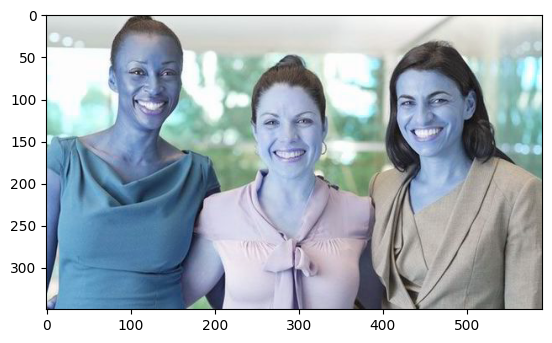

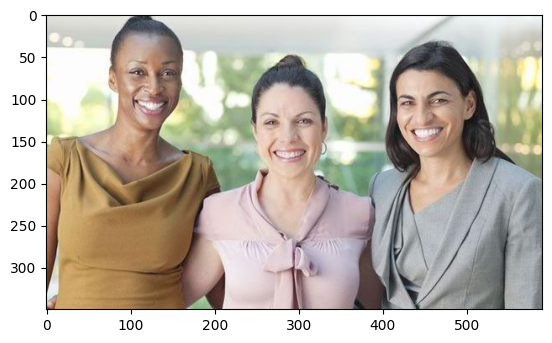

Found 107 files belonging to 2 classes.
(array([[[[2.29896484e+02, 2.21896484e+02, 2.36896484e+02],
         [2.28000000e+02, 2.21000000e+02, 2.37000000e+02],
         [2.29000000e+02, 2.20000000e+02, 2.37000000e+02],
         ...,
         [1.74000000e+02, 1.86000000e+02, 2.28000000e+02],
         [1.76000000e+02, 1.85000000e+02, 2.28000000e+02],
         [1.73593750e+02, 1.84593750e+02, 2.29593750e+02]],

        [[2.24689453e+02, 2.16689453e+02, 2.31689453e+02],
         [2.26378906e+02, 2.15378906e+02, 2.32068359e+02],
         [2.25447266e+02, 2.13689453e+02, 2.31378906e+02],
         ...,
         [1.73689453e+02, 1.85689453e+02, 2.27689453e+02],
         [1.76000000e+02, 1.85000000e+02, 2.28000000e+02],
         [1.74030457e+02, 1.84409363e+02, 2.28788269e+02]],

        [[2.11447266e+02, 2.09964844e+02, 2.25000000e+02],
         [2.10964844e+02, 2.09000000e+02, 2.25482422e+02],
         [2.11964844e+02, 2.08482422e+02, 2.26517578e+02],
         ...,
         [1.73000000e+02, 1.

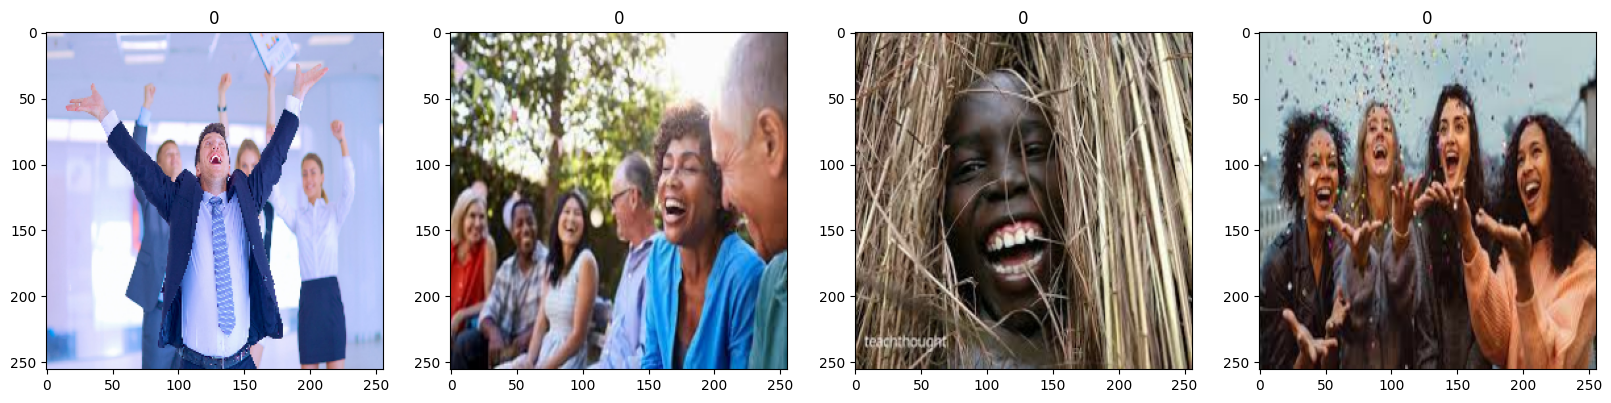

1.0


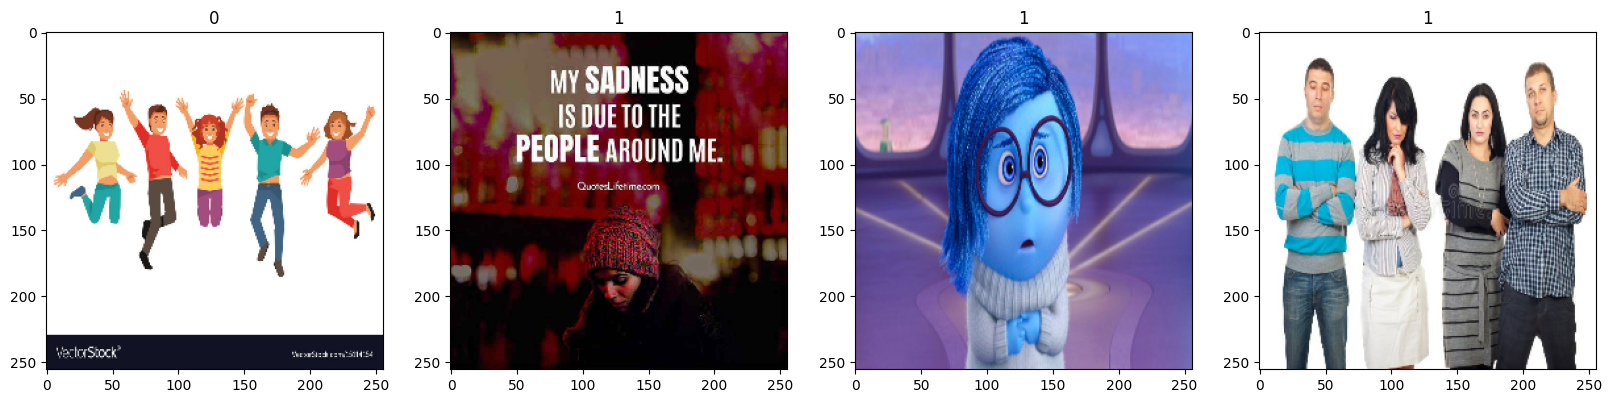

4

In [35]:
#PART 1 BUILDING A DATA PIPELINE
import tensorflow as tf
import os
import cv2
import imghdr #determines type of imgc
from matplotlib import pyplot as plt

data_dir='data'
os.listdir(data_dir)

image_exts = ['jpeg','jpg','bmp','png']
print(image_exts)

img=cv2.imread(os.path.join('data','happy people','1-2.jpg'))
print(img)
print(type(img))
print(img.shape) #it shows 350pixels high(rows) ,590pixels wide and got 3 channels which means it is colored img
plt.imshow(img)
plt.show() #color of img is weird because opencv reads image in bgr and matplotlib in rgb so for normal we write following:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()
#looping for dodgy image script
# looping over every folder in directory 
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):   #looping over each folder and its data inside i.e. images
        image_path = os.path.join(data_dir,image_class,image)      # taking each image explicitly and storing it into variable called image_path
        try:
            img = cv2.imread(image_path) #opens image using opencv
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('image ot ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            #os.remove(image_path)

import numpy as np

data = tf.keras.utils.image_dataset_from_directory('data') #build image dataset
data_iterator = data.as_numpy_iterator() #allows us to access the generator(because it is not preloaded data) from our data pipeline
batch = data_iterator.next() #grab one batch back
len(batch) #images and labels representations
print(batch)
#image represented as numpy arrays
print(batch[0].shape)
print(batch[1]) #here in output 0&1 can be happy or sad 
#for knowing which class the no. is assigned:::
#visualization of multiple images in a grid
fig, ax =plt.subplots(ncols=4,figsize=(20,20)) #here ax is subplots with a single row and 4 cols
#This is a loop that iterates over a subset of the first four elements in batch[0], assuming that batch is a list or an array. 
# The enumerate function is used to loop through the elements while keeping track of their index.
#  idx is the index, and img is the current image.
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
plt.show()

scaled = batch[0] / 255
scaled.max() 
#PART 2 
# preprocessing data
#scale data 
#data.map allows transformation in pipeline...lambda a function

data=data.map(lambda x,y:(x/255,y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
print(batch[0].max())
fig, ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
plt.show()
len(data)





In [17]:
#SPLIT DATA INTO TESTING AND TRAINING DATA
print(len(data))
train_size = int(len(data)*.7)  #training size
print(train_size) 
val_size = int(len(data)*.2)+1  #validation size
test_size = int(len(data)*.1)+1   #testing size
print(val_size)
print(test_size)
#how much data to be take and skip 
#partitions
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#PART3 
#building deep learning model using keras api

from keras.models import Sequential    #sequential is used if you have one input and output and model flows like top to bottom
#here we put layers i.e. convolutional neural network layers,
#maxpooling condenses the images and go to max value in region and return that region
#The flatten layer is used to convert the feature map that it received from the max-pooling layer into a format that the dense layers can understand. 
# A feature map is essentially a multi-dimensional array that contains pixel values; the dense layers require a one-dimensional 
# array as input for processing.
#Dense layer is the regular deeply connected neural network layer
#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

from keras.layers  import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential() #sequential class

#here firstly we put input , architctural decisions ---16 filters of 3x3 pixels sride of 1 i.e move 1 pixel at each time 
#relu activation - we take output and pass through this function 
#in this relu, we convert neg values into 0 and pos remains unchanged
# which basically condenses or extract info
# by scanning inside images to make an output classification
#inut shape = 256x256 pixels and 3 channels
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu')) #256 output value
#sigmoid ftn -- it takes any value and convert into  value between 0 and 1
model.add(Dense(1, activation='sigmoid'))  #single dense layer i.e 1 output value i.e. 0 or 1 value

#compile
#adam is optimizer
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()



4
2
1
1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16

In [18]:
#TRAIN
logdir='logs'
#create a callback to save model at  a particular checkpoint  and do some logging
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
#epoch is how long to go ahead nad it is one run over entire training dataset
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])




Epoch 1/20
2/2 [==============================] - 7s 3s/step - loss: 0.7440 - accuracy: 0.5469 - val_loss: 4.3529 - val_accuracy: 0.4688
Epoch 2/20
2/2 [==============================] - 5s 2s/step - loss: 2.9263 - accuracy: 0.4531 - val_loss: 0.6860 - val_accuracy: 0.5938
Epoch 3/20
2/2 [==============================] - 5s 3s/step - loss: 1.0440 - accuracy: 0.5156 - val_loss: 0.9933 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 4s 2s/step - loss: 0.6968 - accuracy: 0.6094 - val_loss: 0.5832 - val_accuracy: 0.6250
Epoch 5/20
2/2 [==============================] - 5s 2s/step - loss: 0.5972 - accuracy: 0.6406 - val_loss: 0.6450 - val_accuracy: 0.5938
Epoch 6/20
2/2 [==============================] - 4s 2s/step - loss: 0.6126 - accuracy: 0.6719 - val_loss: 0.5874 - val_accuracy: 0.6875
Epoch 7/20
2/2 [==============================] - 5s 2s/step - loss: 0.5914 - accuracy: 0.6562 - val_loss: 0.5291 - val_accuracy: 0.7188
Epoch 8/20
2/2 [=========================

In [20]:
hist.history

{'loss': [0.7440208196640015,
  2.9263134002685547,
  1.044041633605957,
  0.6968095898628235,
  0.5972083806991577,
  0.6125775575637817,
  0.5913519263267517,
  0.5513100624084473,
  0.5101950168609619,
  0.5899461507797241,
  0.45078179240226746,
  0.41004711389541626,
  0.3821977376937866,
  0.37349072098731995,
  0.27012163400650024,
  0.2583217918872833,
  0.20578378438949585,
  0.19719935953617096,
  0.10989260673522949,
  0.09778551757335663],
 'accuracy': [0.546875,
  0.453125,
  0.515625,
  0.609375,
  0.640625,
  0.671875,
  0.65625,
  0.703125,
  0.734375,
  0.6875,
  0.828125,
  0.75,
  0.84375,
  0.84375,
  0.953125,
  0.953125,
  0.921875,
  0.953125,
  1.0,
  0.984375],
 'val_loss': [4.352944374084473,
  0.6860166788101196,
  0.9932805299758911,
  0.5831945538520813,
  0.6450483798980713,
  0.587431013584137,
  0.529122531414032,
  0.5742616653442383,
  0.5483349561691284,
  0.4668711721897125,
  0.47699031233787537,
  0.33845168352127075,
  0.31004559993743896,
  0.333

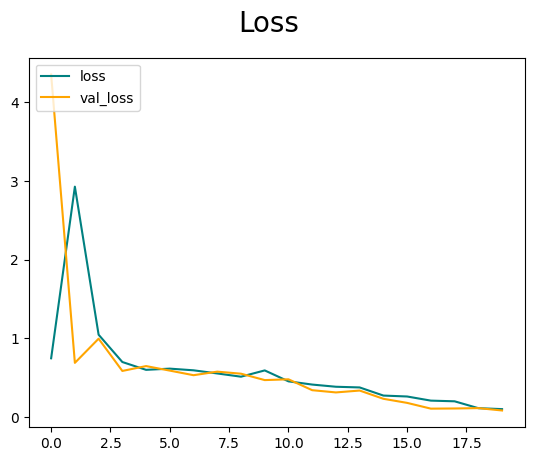

In [21]:
#plot performance
#plotting training and validation loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#if you see loss going down and validation loss rising then it may be problem of overfitting
#it means we have to apply regularization or apply or change some data
#if we see loss is not decreasing or getting weird then we have to change NN ..it can be bias problem




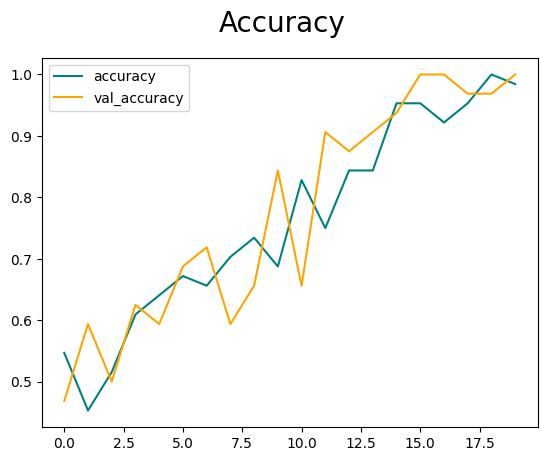

In [22]:
#plotting training and validation accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [27]:
#PART4 
#EVALUATE PERFORMANCE
from keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)   #here y is true vale and yhat is predicted value
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')



1/1 [==============================] - 0s 155ms/step
Precision: 1.0, Recall: 1.0, Accuracy:1.0


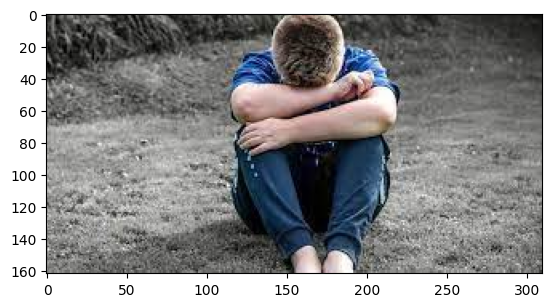

In [45]:
#TEST
img=cv2.imread('sd.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

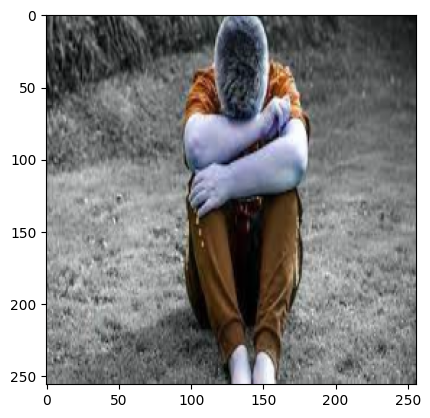

In [46]:
resize= tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
resize.shape
np.expand_dims(resize,0).shape

yhat = model.predict(np.expand_dims(resize/255,0))
yhat

if yhat > 0.5 : 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy') 

1/1 [==============================] - 0s 80ms/step
Predicted class is Sad


In [50]:
#Part 5 Save the model
from keras.models import load_model
model.save(os.path.join('models','happysadmodel.h5')) #serialization file format  
new_model = load_model(os.path.join('models','happysadmodel.h5'))
yhatnew = new_model.predict(np.expand_dims(resize/255,0))
if yhatnew > 0.5:
    print(f'Predicted class is Sad ')
else:
    print(f'Predicted class is Happy ')



C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 132ms/step
Predicted class is Sad 
